## Import Required Library

In [75]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

###  Load the Dataset

In [54]:
df = pd.read_excel('Dataset.xlsx')

In [55]:
df.head()

,Area,Year,Month,Involuntary,Voluntary,Total
0,Unknown,2017 Jul,Jul,2.0,1.0,3.0
1,Unknown,2017 Aug,Aug,10.0,2.0,12.0
2,Unknown,2017 Sep,Sep,0.0,3.0,3.0
3,Unknown,2017 Oct,Oct,0.0,5.0,5.0
4,Unknown,2017 Nov,Nov,0.0,6.0,6.0


In [56]:
df.shape

(999, 6)

In [57]:
df.info() #check the basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         225 non-null    object 
 1   Year         225 non-null    object 
 2   Month        225 non-null    object 
 3   Involuntary  225 non-null    float64
 4   Voluntary    225 non-null    float64
 5   Total        225 non-null    float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [58]:
df.describe() #check the basic statistics information

,Involuntary,Voluntary,Total
count,225.000000,225.000000,225.000000
mean,28.728889,34.555556,63.284444
std,38.734701,48.193877,71.908293
min,0.000000,0.000000,1.000000
25%,3.000000,4.000000,8.000000
50%,16.000000,14.000000,37.000000
75%,38.000000,36.000000,92.000000
max,267.000000,208.000000,316.000000


In [59]:
df.isnull().sum() # check the null values

Area           774
Year           774
Month          774
Involuntary    774
Voluntary      774
Total          774
dtype: int64

In [60]:
# df['Years']= df["Month"] + df["Year"].astype(str)

In [61]:
df['Year'] = pd.to_datetime(df['Year'])

In [62]:
df = df[["Year","Involuntary","Voluntary"]]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         225 non-null    datetime64[ns]
 1   Involuntary  225 non-null    float64       
 2   Voluntary    225 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.5 KB


In [64]:
df = df.fillna(0)

In [65]:
df = df.loc[:224 ] # clean dataset
df

,Year,Involuntary,Voluntary
0,2017-07-01 00:00:00,2.0,1.0
1,2017-08-01 00:00:00,10.0,2.0
2,2017-09-01 00:00:00,0.0,3.0
3,2017-10-01 00:00:00,0.0,5.0
4,2017-11-01 00:00:00,0.0,6.0
...,...,...,...
220,2021-02-01 00:00:00,0.0,1.0
221,2021-03-01 00:00:00,3.0,1.0
222,2021-05-01 00:00:00,1.0,0.0
223,2021-06-01 00:00:00,0.0,1.0


In [66]:
df.set_index('Year',inplace = True)

In [67]:
df

,Involuntary,Voluntary
Year,,
2017-07-01,2.0,1.0
2017-08-01,10.0,2.0
2017-09-01,0.0,3.0
2017-10-01,0.0,5.0
2017-11-01,0.0,6.0
...,...,...
2021-02-01,0.0,1.0
2021-03-01,3.0,1.0
2021-05-01,1.0,0.0


## Aggregate the dataset

In [138]:
pd.pivot_table(df, values=['Involuntary', 'Voluntary'], index='Year',
                   aggfunc={'Involuntary': np.sum,'Voluntary': np.sum})

,Involuntary,Voluntary
Year,,
2017-07-01,76.0,119.0
2017-08-01,50.0,30.0
2017-09-01,42.0,152.0
2017-10-01,57.0,121.0
2017-11-01,141.0,120.0
2017-12-01,31.0,127.0
2018-01-01,34.0,100.0
2018-02-01,173.0,106.0
2018-03-01,44.0,122.0


In [103]:
df1 = df.groupby('Year').aggregate({'Involuntary': 'sum',
                             'Voluntary': 'sum'})

In [104]:
df1

,Involuntary,Voluntary
Year,,
2017-07-01,76.0,119.0
2017-08-01,50.0,30.0
2017-09-01,42.0,152.0
2017-10-01,57.0,121.0
2017-11-01,141.0,120.0
2017-12-01,31.0,127.0
2018-01-01,34.0,100.0
2018-02-01,173.0,106.0
2018-03-01,44.0,122.0


## Data Visualization

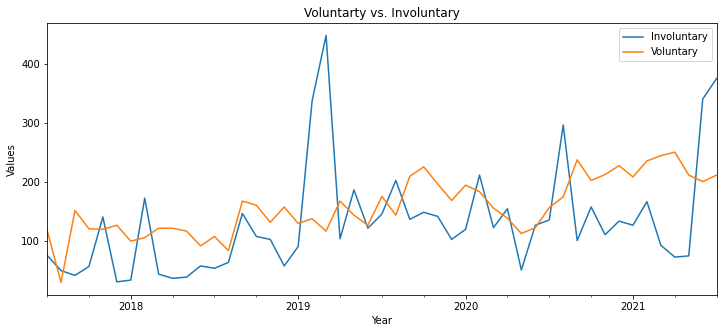

In [105]:
title = 'Voluntarty vs. Involuntary'
ylabel='Values'
xlabel=''
ax = df1['Involuntary'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df1['Voluntary'].plot(legend=True)
plt.show()

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2017-07-01 to 2021-07-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Involuntary  49 non-null     float64
 1   Voluntary    49 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [107]:
df1.columns

Index(['Involuntary', 'Voluntary'], dtype='object')

In [79]:
import matplotlib.pyplot as plt

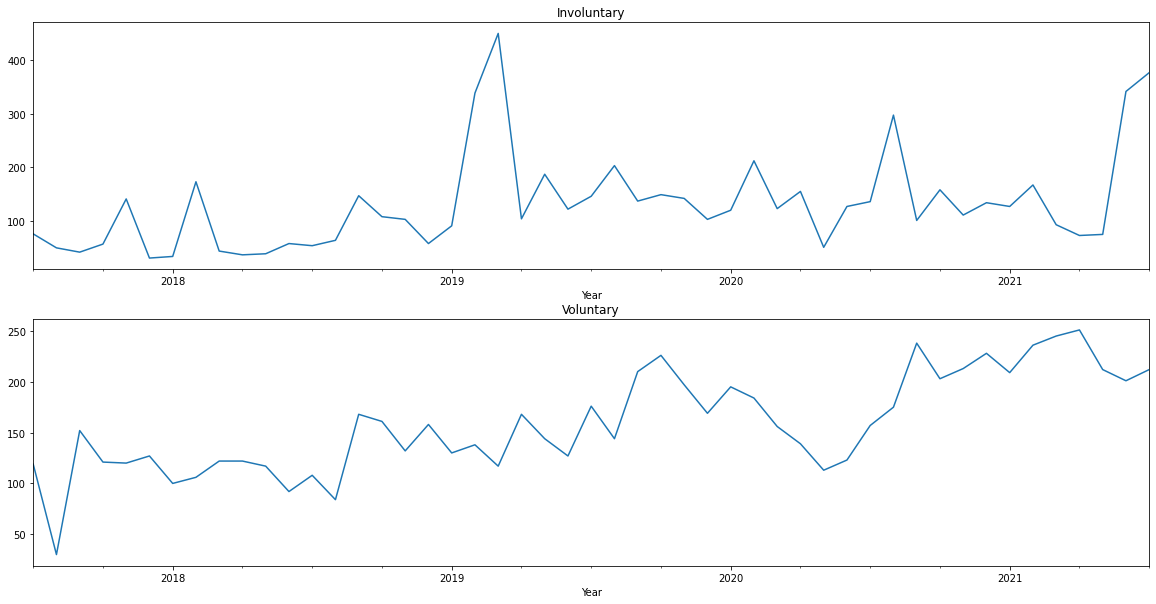

In [108]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
for i,column in enumerate([col for col in df1.columns]):
    df1[column].plot(ax=ax[i])
    ax[i].set_title(column)

###  Autocorrelation plot

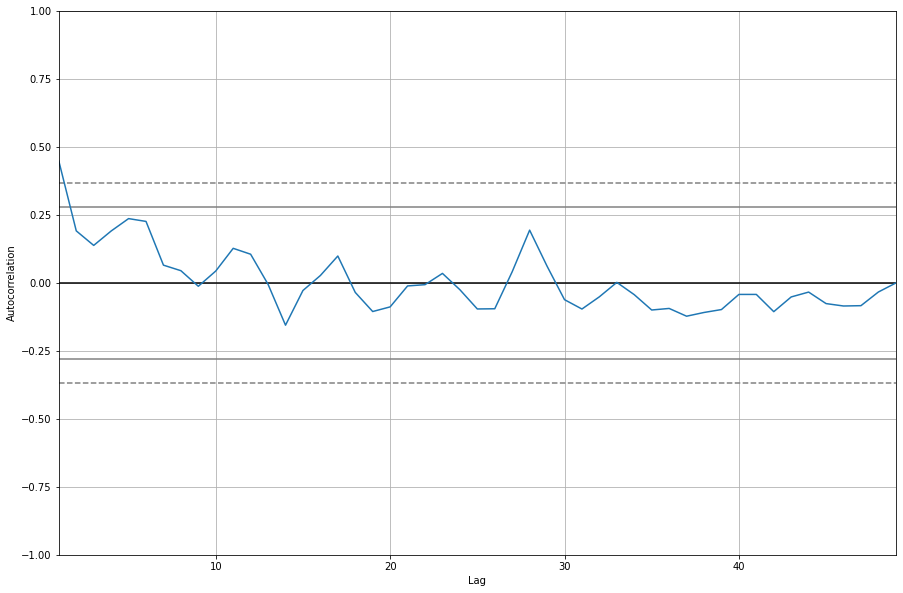

In [109]:
from pandas.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10,6
rcParams['figure.figsize'] = 15,10
autocorrelation_plot(df1)
plt.show()


In [82]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

## Model part

### VAR (Vector autoregression)

In [83]:
%matplotlib inline
# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [110]:
adf_test(df1['Involuntary'],title='Involuntary')

Augmented Dickey-Fuller Test: Involuntary
ADF test statistic      -4.006374
p-value                  0.001377
# lags used              0.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [111]:
adf_test(df1['Voluntary'],title='voluntary')

Augmented Dickey-Fuller Test: voluntary
ADF test statistic      -2.664515
p-value                  0.080382
# lags used              0.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [113]:
nobs=12
train, test = df1[0:-nobs], df1[-nobs:]

In [115]:
test

,Involuntary,Voluntary
Year,,
2020-08-01,297.0,175.0
2020-09-01,101.0,238.0
2020-10-01,158.0,203.0
2020-11-01,111.0,213.0
2020-12-01,134.0,228.0
2021-01-01,127.0,209.0
2021-02-01,167.0,236.0
2021-03-01,93.0,245.0
2021-04-01,73.0,251.0


In [116]:
train

,Involuntary,Voluntary
Year,,
2017-07-01,76.0,119.0
2017-08-01,50.0,30.0
2017-09-01,42.0,152.0
2017-10-01,57.0,121.0
2017-11-01,141.0,120.0
2017-12-01,31.0,127.0
2018-01-01,34.0,100.0
2018-02-01,173.0,106.0
2018-03-01,44.0,122.0


In [117]:
print(train.shape)
print(test.shape)

(37, 2)
(12, 2)


In [118]:
from statsmodels.tsa.api import VAR

In [119]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.926989922057201
BIC:  16.19090974513322

Order = 2
AIC:  15.7944670732544
BIC:  16.238852233679946

Order = 3
AIC:  15.93093721724469
BIC:  16.559438609733697

Order = 4
AIC:  16.156681260531123
BIC:  16.97295811224011

Order = 5
AIC:  16.294073843859298
BIC:  17.30176727703411

Order = 6
AIC:  16.401733022293826
BIC:  17.604431967991047

Order = 7
AIC:  16.324539011928024
BIC:  17.72573639359018



c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueW

In [120]:
model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.926989922057201
BIC:  16.19090974513322

Order = 2
AIC:  15.7944670732544
BIC:  16.238852233679946

Order = 3
AIC:  15.93093721724469
BIC:  16.559438609733697

Order = 4
AIC:  16.156681260531123
BIC:  16.97295811224011

Order = 5
AIC:  16.294073843859298
BIC:  17.30176727703411

Order = 6
AIC:  16.401733022293826
BIC:  17.604431967991047

Order = 7
AIC:  16.324539011928024
BIC:  17.72573639359018



c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [121]:
model.endog_names

['Involuntary', 'Voluntary']

## Model Summary

In [122]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Aug, 2021
Time:                     16:57:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    17.3018
Nobs:                     32.0000    HQIC:                   16.6281
Log likelihood:          -329.517    FPE:                1.26407e+07
AIC:                      16.2941    Det(Omega_mle):     7.00056e+06
--------------------------------------------------------------------
Results for equation Involuntary
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                -13.968719        83.747571           -0.167           0.868
L1.Involuntary         0.281118         0.203128            1.384           0.166
L1.Voluntary           0.414484         0.650791  

In [123]:
lag_order = results.k_ar
lag_order

5

In [124]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[162.64842831, 157.42729769],
       [145.22327132, 159.44819803],
       [ 88.85106145, 150.71194502],
       [ 98.80989501, 143.92026286],
       [134.81145871, 143.32070841],
       [152.47271592, 148.60263952],
       [156.5529987 , 151.73651011],
       [138.88642811, 149.87941982],
       [125.79573623, 148.81759443],
       [129.57346714, 148.15547247],
       [139.90587856, 149.74728937],
       [146.27950324, 152.09251324]])

In [125]:
test

,Involuntary,Voluntary
Year,,
2020-08-01,297.0,175.0
2020-09-01,101.0,238.0
2020-10-01,158.0,203.0
2020-11-01,111.0,213.0
2020-12-01,134.0,228.0
2021-01-01,127.0,209.0
2021-02-01,167.0,236.0
2021-03-01,93.0,245.0
2021-04-01,73.0,251.0


## Forecasting values

In [127]:
idx = pd.date_range('2021-07-02', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['Involuntary_F','Voluntary_F'])
df_forecast

,Involuntary_F,Voluntary_F
2021-08-01,162.648428,157.427298
2021-09-01,145.223271,159.448198
2021-10-01,88.851061,150.711945
2021-11-01,98.809895,143.920263
2021-12-01,134.811459,143.320708
2022-01-01,152.472716,148.602640
2022-02-01,156.552999,151.736510
2022-03-01,138.886428,149.879420
2022-04-01,125.795736,148.817594
2022-05-01,129.573467,148.155472


In [128]:
df_forecast['InVol'] = (df['Involuntary'].iloc[-nobs-1]-df['Involuntary'].iloc[-nobs-2]) + df_forecast['Involuntary_F'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['InvolForecast'] = df['Involuntary'].iloc[-nobs-1] + df_forecast['InVol'].cumsum()

In [129]:
df_forecast['Vol'] = (df['Voluntary'].iloc[-nobs-1]-df['Voluntary'].iloc[-nobs-2]) + df_forecast['Voluntary_F'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['VolForecast'] = df['Voluntary'].iloc[-nobs-1] + df_forecast['Vol'].cumsum()

In [130]:
df_forecast

,Involuntary_F,Voluntary_F,InVol,InvolForecast,Vol,VolForecast
2021-08-01,162.648428,157.427298,162.648428,163.648428,158.427298,160.427298
2021-09-01,145.223271,159.448198,307.871700,471.520128,317.875496,478.302793
2021-10-01,88.851061,150.711945,396.722761,868.242889,468.587441,946.890234
2021-11-01,98.809895,143.920263,495.532656,1363.775545,612.507704,1559.397938
2021-12-01,134.811459,143.320708,630.344115,1994.119660,755.828412,2315.226350
2022-01-01,152.472716,148.602640,782.816831,2776.936491,904.431052,3219.657401
2022-02-01,156.552999,151.736510,939.369829,3716.306320,1056.167562,4275.824963
2022-03-01,138.886428,149.879420,1078.256258,4794.562578,1206.046981,5481.871944
2022-04-01,125.795736,148.817594,1204.051994,5998.614571,1354.864576,6836.736520
2022-05-01,129.573467,148.155472,1333.625461,7332.240032,1503.020048,8339.756569


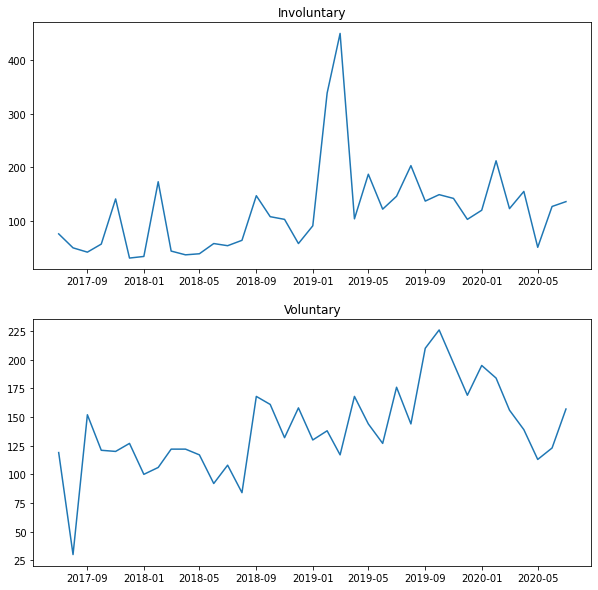

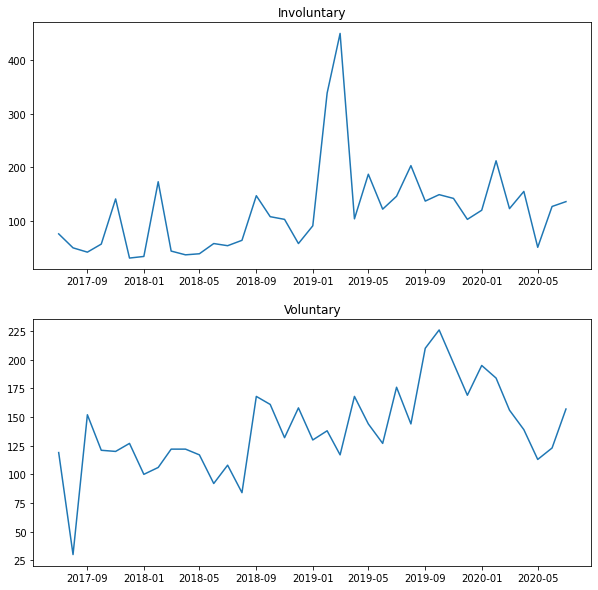

In [131]:
results.plot()

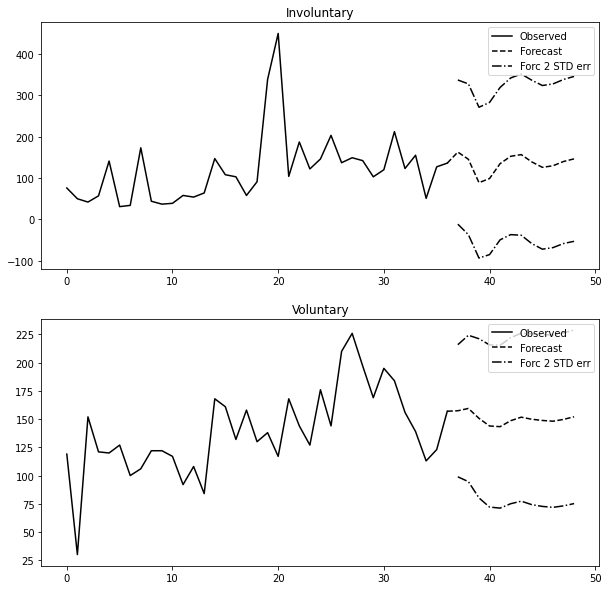

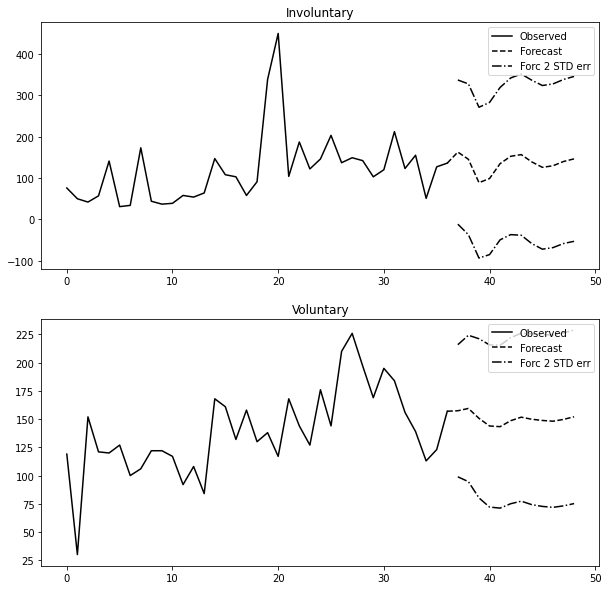

In [132]:
results.plot_forecast(12)

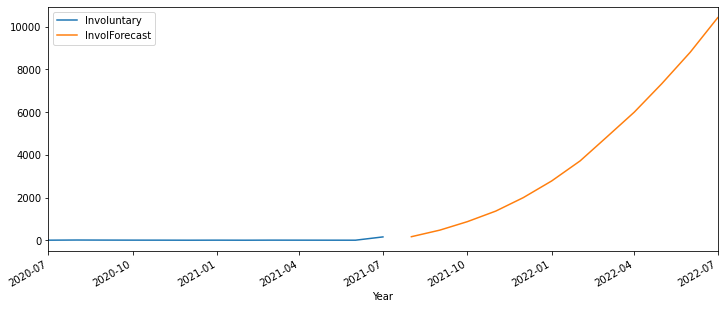

In [133]:
df['Involuntary'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['InvolForecast'].plot(legend=True);

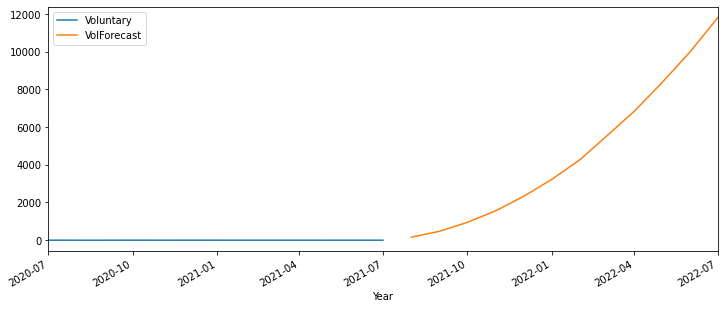

In [134]:
df['Voluntary'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['VolForecast'].plot(legend=True);


In [135]:
RMSE1 = rmse(df['Involuntary'][-nobs:], df_forecast['InvolForecast'])
print(f'Involuntary VAR(5) RMSE: {RMSE1:.3f}')

Involuntary VAR(5) RMSE: 5196.501


In [136]:
RMSE2 = rmse(df['Voluntary'][-nobs:], df_forecast['VolForecast'])
print(f'Voluntary VAR(5) RMSE: {RMSE2:.3f}')

Voluntary VAR(5) RMSE: 5936.242
